In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data cleaning

In [ ]:
import pandas as pd 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20190928-reviews.csv')

In [ ]:
data

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,"September 24, 2019",True,International version. Will require USA adapte...,Best phone at this price.,NaN
82811,B07WXKWDT2,rvwonder,3,"September 17, 2019",False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN
82812,B07WXKWDT2,markw707,1,"September 8, 2019",False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN
82813,B07WXKWDT2,Amazon Customer,1,"September 13, 2019",False,Camera is not good,As far as function works great camera no go wo...,NaN


In [ ]:
dataset = data[['body','title']]

In [ ]:
import re

def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    
    return (newString)

In [ ]:
#Dropping duplicates and na's
dataset.drop_duplicates(subset=['body'],inplace=True)
dataset.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cl_body = []
cl_title=[]
for t in dataset['body']:
    cl_body.append(text_cleaner(t)) 
for i in dataset['title']:
    cl_title.append(text_cleaner(i)) 

In [ ]:
df = {'body':cl_body,
      'title':cl_title}
df = pd.DataFrame(df)
df
#df : cleaned dataFrame

,body,title
0,i had the samsung a for awhile which is abs...,def not best but not worst
1,due to a software issue between nokia and spri...,text messaging doesn t work
2,this is a great reliable phone i also purcha...,love this phone
3,i love the phone and all because i really did...,love the phone but
4,the phone has been great for every purpose it ...,great phone service and options lousy case
...,...,...
72617,best phone at this price,international version will require usa adapte...
72618,if you intend to use this phone on t mobile be...,be careful of international version if using t...
72619,here is my moto g play complaint it freezes ...,moto g play freezes every time i use it
72620,as far as function works great camera no go wo...,camera is not good


In [ ]:
max = len(df['body'][0].split())
for i in range(72622):
  if len(df['body'][i].split())>max  :
    max = len(df['body'][i].split())
max
#longest summary

5046

In [ ]:
maxtitle = len(df['title'][0].split())
for i in range(72622):
  if len(df['title'][i].split())>max  :
    maxtitle = len(df['title'][i].split())
maxtitle
#longest title

6

In [ ]:
df['title'] = df['title'].apply(lambda x : 'sostok '+ x + ' eostok')
#marking the end and start of the title (target)

In [ ]:
df

,body,title
0,i had the samsung a for awhile which is abs...,sostok def not best but not worst eostok
1,due to a software issue between nokia and spri...,sostok text messaging doesn t work eostok
2,this is a great reliable phone i also purcha...,sostok love this phone eostok
3,i love the phone and all because i really did...,sostok love the phone but eostok
4,the phone has been great for every purpose it ...,sostok great phone service and options lousy ...
...,...,...
72617,best phone at this price,sostok international version will require usa...
72618,if you intend to use this phone on t mobile be...,sostok be careful of international version if ...
72619,here is my moto g play complaint it freezes ...,sostok moto g play freezes every time i use i...
72620,as far as function works great camera no go wo...,sostok camera is not good eostok


Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
tokenizer_body = Tokenizer()
tokenizer_title = Tokenizer()
tokenizer_body.fit_on_texts(list(df['body']))
tokenizer_title.fit_on_texts(list(df['title']))

In [ ]:
cnt_body=0
cnt_title=0
for key,value in tokenizer_title.word_counts.items():
    cnt_title=cnt_title+1
for key,value in tokenizer_body.word_counts.items():
    cnt_body=cnt_body+1
print(cnt_title)
print(cnt_body)


9772
32951


In [ ]:
tokenizer_body = Tokenizer(num_words=cnt_body)
tokenizer_title = Tokenizer(num_words=cnt_title)
tokenizer_body.fit_on_texts(list(df['body']))
tokenizer_title.fit_on_texts(list(df['title']))
X = tokenizer_body.texts_to_sequences(df['body'].values.astype(str))
Y = tokenizer_title.texts_to_sequences(df['title'].values.astype(str))
X = pad_sequences(X,100)
Y = pad_sequences(Y,maxtitle)
X[:1]


array([[  648,  1273,     3,    16,    13,   498,   525,     7,    13,
          140,    65,     9,     5,    57,   400,    80,     1,  1200,
         2865,    45,   701,   274,     7,   470,     4,     1,     5,
          324,   710,   356,     4,    42,    25,    27,    77,     3,
          125,    17,  1778,    55,    34,     6, 18105,    16,     1,
        10663,   441,   695,   218,     5, 18106,   118,   684,   496,
           31,  2674,  1633,     7,  1861,     3,  2184,  1082,    38,
           33,   276,     7,  2417,  1986,  9009,  4218,   427,   230,
          759,     5,     3,  2885,   107,  1690,    20,   305, 12011,
           16,  1293,     7,   220,    40,    62,   617,    59,    35,
          419,   312,    49,    24,    24,    48,    21,    38,    49,
           25]], dtype=int32)

In [ ]:
x_voc=tokenizer_body.num_words +1
print(x_voc)
y_voc = tokenizer_title.num_words +1
max_text_len = max
print(y_voc)

32952
9773


Modeling

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(np.array(X),np.array(Y),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
import numpy as np
import pandas as pd 
import re
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(100,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = Attention(name='attention_layer')
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     3295200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
x_tr=X_train
y_tr=Y_train
x_val=X_test
y_val=Y_test

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:],epochs=10,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10
511/511 [==============================] - 969s 2s/step - loss: 3.5744 - val_loss: 3.2569
Epoch 2/10
511/511 [==============================] - 864s 2s/step - loss: 3.1066 - val_loss: 3.0049
Epoch 3/10
511/511 [==============================] - 875s 2s/step - loss: 2.8886 - val_loss: 2.8536
Epoch 4/10
511/511 [==============================] - 877s 2s/step - loss: 2.7779 - val_loss: 2.7678
Epoch 5/10
511/511 [==============================] - 865s 2s/step - loss: 2.7162 - val_loss: 2.7450
Epoch 6/10
511/511 [==============================] - 874s 2s/step - loss: 2.6380 - val_loss: 2.6724
Epoch 7/10
511/511 [==============================] - 860s 2s/step - loss: 2.5938 - val_loss: 2.6425
Epoch 8/10
511/511 [==============================] - 863s 2s/step - loss: 2.5584 - val_loss: 2.6378
Epoch 9/10
511/511 [==============================] - 863s 2s/step - loss: 2.5308 - val_loss: 2.6138
Epoch 10/10
511/511 [==============================] - 856s 2s/step - loss: 2.5143 - val_lo

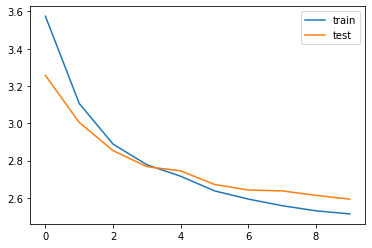

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.save('/content/drive/MyDrive/model3.h5')

In [ ]:
reverse_target_word_index=tokenizer_title.index_word
reverse_source_word_index=tokenizer_body.index_word
target_word_index=tokenizer_title.word_index

In [ ]:
import tensorflow as tf
Model = tf.keras.models.load_model('/content/drive/MyDrive/model2.h5')

Inference

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(100,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_layer = Attention(name='attention_layer')
attn_out = attn_layer([ decoder_outputs2,decoder_hidden_state_input])
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([attn_out,decoder_outputs2])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_concat_input) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (50-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(3):
    print("Review:",seq2text(x_tr[i][:100]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i][:100].reshape(1,100)))
    print("\n")

Review: best decision i have taken on buying this awesome phone received day before expected and shout out to this seller the phone looks brand new i love it 
Original summary: and it a beautiful device 
Predicted summary:  scammers shape shape recalled me peasy warrantied cero shape shape shape wallet shape under shape refubished heated shape shape shape heated shape shape squeeze stilled stilled stilled stilled motion stop ight subject subject reviewed variant scammers juggernaut juggernaut juggernaut bayshine criticisms bayshine fone scratched convenient criticisms buen variant shape


Review: the s edge att version is full of bloatware just buy an asia unlocked version for a little more and you do not need to worry about dealing with att to unlock this phone for another bucks you have another option of getting dual sim option so you can have numbers of traveling also the att version is much slower than the asia version go check and do some research and there is even a video conpari